In [ ]:
!pip install konlpy
!pip install sentence_transformers
!pip install transformers
!pip install --upgrade translators

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=161c2c0d74b950ec050f3684ff44af32a2e4b7b37a63ef46082af6196374e9d1
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_tran

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579

In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm #진행자
import random
import pickle #모델 저장

import tensorflow as tf

import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from transformers import AutoTokenizer, TFBertModel
from sentence_transformers import SentenceTransformer, util, models

# #번역
# import translators as ts

# #img url -> img
# from IPython.display import display, Image, HTML
# from PIL import Image
# import requests
# from io import BytesIO

# import gradio as gr

Using region Iowa server backend.



In [ ]:
# SBERT 모델을 로드합니다.
sbert_model = SentenceTransformer('bert-base-uncased', cache_folder='/root/.cache/torch/sentence_transformers')

In [ ]:
def greet(user_input):
    # 문장 번역
    user_input = ts.translate_text(user_input, translator='modernMt', from_language='ko')

    # 영어로 번역된 사용자 입력을 SBERT 모델로 임베딩합니다.
    user_input_embedding = sbert_model.encode(user_input, convert_to_tensor=True)

    # 각 향수 설명과 사용자 입력 간의 코사인 유사도를 계산합니다.
    similarities = []
    for description_embedding in tqdm(perfume_embeddings, desc="유사도 계산"):
        similarity = util.pytorch_cos_sim(user_input_embedding, description_embedding)
        similarities.append(similarity.item())

    # 가장 유사도가 높은 향수의 인덱스를 찾습니다.
    best_match_idx = similarities.index(max(similarities))

    recommended_perfume = dataset.loc[best_match_idx]
    brand_en = ts.translate_text(recommended_perfume['Brand'], translator='google', to_language='en')
    name_en = ts.translate_text(recommended_perfume['Name'], translator='google', to_language='en')
    notes_ko = ts.translate_text(recommended_perfume['Notes'], translator='modernMt', to_language='ko')
    description_ko = ts.translate_text(recommended_perfume['Description'], translator='modernMt', to_language='ko')
    keyword = dataset['Name'][best_match_idx].replace(' ', '+')
    image_url = recommended_perfume['Img URL']
    similarity = similarities[best_match_idx]

    recommended_perfume_info = f"<b>브랜드:</b> {brand_en}<br><b>이름:</b> {name_en}<br><b>노트:</b> {notes_ko}<br><b>설명&리뷰:</b> {description_ko}<br>"
    recommended_perfume_info += f"<b>구매 링크:</b> <a href='https://www.amazon.com/s?k={keyword}&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20'>Amazon</a><br>"
    recommended_perfume_info += f"<b>이미지:</b> <img src='{image_url}' width='300' height='300'><br>"
    recommended_perfume_info += f"<b>유사도:</b> {similarity}"
    return recommended_perfume_info

demo = gr.Interface(fn=greet, inputs="text", outputs="html", description = "6조 미니 프로젝트 - 원하는 향이나 느낌을 입력하면 향수를 추천해 드립니다. \n ex1)무화과 요정 숲속 풀 꽃 싱그러움 ex2) 20대 남성용 가을 겨울 추운 날씨에 사용하기 좋은 우디 향수 ")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://59b529cdf854b55bcb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def perfume(user_input):
    # 문장 번역
    user_input = ts.translate_text(user_input, translator='modernMt', from_language='ko')

    # 영어로 번역된 사용자 입력을 SBERT 모델로 임베딩합니다.
    user_input_embedding = sbert_model.encode(user_input, convert_to_tensor=True)

    # 각 향수 설명과 사용자 입력 간의 코사인 유사도를 계산합니다.
    similarities = []
    for description_embedding in tqdm(perfume_embeddings, desc="유사도 계산"):
        similarity = util.pytorch_cos_sim(user_input_embedding, description_embedding)
        similarities.append(similarity.item())

    # 가장 유사도가 높은 향수의 인덱스를 찾습니다.
    best_match_idx = similarities.index(max(similarities))

    recommended_perfume = dataset.loc[best_match_idx]
    brand_en = ts.translate_text(recommended_perfume['Brand'], translator='google', to_language='en')
    origin_name = recommended_perfume['Name']
    name_en = ts.translate_text(recommended_perfume['Name'], translator='google', to_language='en')
    notes_ko = ts.translate_text(recommended_perfume['Notes'], translator='modernMt', to_language='ko')
    description_ko = ts.translate_text(recommended_perfume['Description'], translator='modernMt', to_language='ko')
    keyword = dataset['Name'][best_match_idx].replace(' ', '+')
    image_url = recommended_perfume['Img URL']
    similarity = similarities[best_match_idx]

    recommended_perfume_info = f"<b>브랜드:</b> {brand_en}<br><b>이름:</b> {name_en}<br><b>노트:</b> {notes_ko}<br><b>설명&리뷰:</b> {description_ko}<br>"
    recommended_perfume_info += f"<b>구매 링크:</b> <a href='https://www.amazon.com/s?k={keyword}&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20'>Amazon</a><br>"
    recommended_perfume_info += f"<b>이미지:</b> <img src='{image_url}' width='300' height='300'><br>"
    recommended_perfume_info += f"<b>유사도:</b> {similarity}"
    return recommended_perfume_info

demo = gr.Interface(fn=greet, inputs="text", outputs="html", description = "원하는 향이나 느낌을 입력하면 향수를 추천해 드립니다. ex1)무화과 요정 숲속 풀 꽃 싱그러움 ex2) 선선한 가을이나 추운 겨울 날씨에 쓰기 좋은 포근한 나무 우디 계열의 선물하기 좋은 20대 남자 향수")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c1996cbdb4ca2019d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def finalperfume(user_input):
    # 문장 번역
    user_input = ts.translate_text(user_input, translator='modernMt', from_language='ko')

    # 영어로 번역된 사용자 입력을 SBERT 모델로 임베딩합니다.
    user_input_embedding = sbert_model.encode(user_input, convert_to_tensor=True)

    # 각 향수 설명과 사용자 입력 간의 코사인 유사도를 계산합니다.
    similarities = []
    for description_embedding in tqdm(perfume_embeddings, desc="유사도 계산"):
        similarity = util.pytorch_cos_sim(user_input_embedding, description_embedding)
        similarities.append(similarity.item())

    # 가장 유사도가 높은 향수의 인덱스를 찾습니다.
    best_match_idx = similarities.index(max(similarities))

    recommended_perfume = dataset.loc[best_match_idx]
    brand_en = ts.translate_text(recommended_perfume['Brand'], translator='google', to_language='en')
    origin_name = recommended_perfume['Name']
    name_en = ts.translate_text(recommended_perfume['Name'], translator='google', to_language='en')
    notes_ko = ts.translate_text(recommended_perfume['Notes'], translator='modernMt', to_language='ko')
    description_ko = ts.translate_text(recommended_perfume['Description'], translator='modernMt', to_language='ko')
    keyword = dataset['Name'][best_match_idx].replace(' ', '+')
    image_url = recommended_perfume['Img URL']
    similarity = similarities[best_match_idx]

    recommended_perfume_info = f"<b>브랜드:</b> {brand_en}<br><b>이름:</b><b>{origin_name}</b><b>(영문):</b>{name_en}<br><b>노트:</b> {notes_ko}<br><b>설명&리뷰:</b> {description_ko}<br>"
    recommended_perfume_info += f"<b>구매 링크:</b> <a href='https://www.amazon.com/s?k={keyword}&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20'>Amazon</a><br>"
    recommended_perfume_info += f"<b>이미지:</b> <img src='{image_url}' width='300' height='300'><br>"
    recommended_perfume_info += f"<b>유사도:</b> {similarity}"
    return recommended_perfume_info

demo = gr.Interface(fn=greet, inputs="text", outputs="html", description = "원하는 향이나 느낌을 입력하면 향수를 추천해 드립니다. ex1)무화과 요정 숲속 풀 꽃 싱그러움 ex2) 선선한 가을이나 추운 겨울 날씨에 쓰기 좋은 포근한 나무 우디 계열의 선물하기 좋은 20대 남자 향수")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9a777513c877452ddb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/향수 프로젝트/all_pf_df (1)', encoding= 'latin-1')   #데이터프레임
dataset = data.copy()
#str형태로 변환
dataset = dataset.astype(str)
#출력
# dataset.tail(3)

#중복 리뷰 없는 독립된 향수 df 추출
independent_rows = dataset[~dataset.duplicated(subset=['Name', 'Brand'], keep=False)]
# independent_rows.tail(3)

# 중복 리뷰 있는 향수의 행 df 추출
merged_dataset = dataset[dataset.duplicated(subset=['Name', 'Brand'], keep=False)]
# merged_dataset[:30]
merged_dataset['Notes'] = merged_dataset.groupby(['Name', 'Brand'])['Notes'].transform('first')
merged_dataset['Img URL'] = merged_dataset.groupby(['Name', 'Brand'])['Img URL'].transform('first')
merged_dataset['Description'] = merged_dataset.groupby(['Name', 'Brand'])['Description'].transform(lambda x: ' '.join(x))
# 중복 리뷰df에 남아있는 중복된 행들을 제거합니다.
merged_dataset = merged_dataset.drop_duplicates(subset=['Name', 'Brand'])

# 결과를 출력합니다.
# merged_dataset

# '중복 & 독립' 두 데이터프레임을 합칩니다.
combined_df = pd.concat([merged_dataset, independent_rows], ignore_index=True)
# 의미 없는 컬럼 삭제
combined_df = combined_df.drop(columns=['Unnamed: 0'])
# Sbert코드에 들어갈 변수명으로 변경 후 결과를 출력합니다.
dataset = combined_df
dataset

<ipython-input-14-aa66be03e7a1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['Notes'] = merged_dataset.groupby(['Name', 'Brand'])['Notes'].transform('first')
<ipython-input-14-aa66be03e7a1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['Img URL'] = merged_dataset.groupby(['Name', 'Brand'])['Img URL'].transform('first')
<ipython-input-14-aa66be03e7a1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Name,Brand,Description,Notes,Img URL
0,Gentleman Society,Givenchy,It's so forgettable that I don't really rememb...,"sage, vetiver, cedarwood",https://basenotes.com/img/product/8611672741796-j
1,Jasmin Bonheur,Guerlain,My testing experience was a WOW. Sure; there a...,"rose, iris, apricot",https://basenotes.com/img/product/2811672580278-p
2,Cherry Smoke,Tom Ford,"Nice, but brief cherry note followed by some i...","Dark Cherry, Osmanthis, Cypriol, Smoked Woods",https://basenotes.com/img/product/1431675673621-j
3,LâHomme IdÃ©al Platine PrivÃ©,Guerlain,I am trying to find the new LâIdeal and even...,"Grapefruit, Bergamot, pink pepper",https://basenotes.com/img/product/4211680597479-j
4,Y Eau de Parfum Intense,Yves Saint Laurent,"A bog-standard ""bleue"" aquatic with the additi...","Bergamot, Juniper berry, Ginger",https://basenotes.com/img/product/2711676379948-w
...,...,...,...,...,...
34552,Perfect Veil Eau de Parfum,Sarah Horowitz Parfums,"This was created to smell like clean, naked s...","top: lemon, bergamot base: musk, vanilla, san...",https://static.luckyscent.com/images/products/...
34553,Scent Eau de Parfum,Costume National,Scent is Costume Nationals debut fragrance. W...,"amber, jasmine tea, mother of pearl hibiscus ...",https://static.luckyscent.com/images/products/...
34554,Bronze Eau de Parfum,Nanadebary,"Bronze is a naughty little vixen of a scent, ...","bergamot, mandarine, cinnamon, jasmine, iris,...",https://static.luckyscent.com/images/products/...
34555,Monyette Paris Fragrance Oil,Monyette Paris,"This isn't just sexy, it's Âbig night outÂ ...","Tahitian gardenia, French muguet du bois, hin...",https://static.luckyscent.com/images/products/...


In [ ]:
#불러오는 데이터셋 전처리
dataset['Description'] = dataset['Description'].replace('[^a-zA-Z0-9\s]', '', regex=True)
dataset

,Name,Brand,Description,Notes,Img URL
0,Gentleman Society,Givenchy,Its so forgettable that I dont really remember...,"sage, vetiver, cedarwood",https://basenotes.com/img/product/8611672741796-j
1,Jasmin Bonheur,Guerlain,My testing experience was a WOW Sure there are...,"rose, iris, apricot",https://basenotes.com/img/product/2811672580278-p
2,Cherry Smoke,Tom Ford,Nice but brief cherry note followed by some in...,"Dark Cherry, Osmanthis, Cypriol, Smoked Woods",https://basenotes.com/img/product/1431675673621-j
3,LâHomme IdÃ©al Platine PrivÃ©,Guerlain,I am trying to find the new LIdeal and even th...,"Grapefruit, Bergamot, pink pepper",https://basenotes.com/img/product/4211680597479-j
4,Y Eau de Parfum Intense,Yves Saint Laurent,A bogstandard bleue aquatic with the addition ...,"Bergamot, Juniper berry, Ginger",https://basenotes.com/img/product/2711676379948-w
...,...,...,...,...,...
34552,Perfect Veil Eau de Parfum,Sarah Horowitz Parfums,This was created to smell like clean naked sk...,"top: lemon, bergamot base: musk, vanilla, san...",https://static.luckyscent.com/images/products/...
34553,Scent Eau de Parfum,Costume National,Scent is Costume Nationals debut fragrance Wh...,"amber, jasmine tea, mother of pearl hibiscus ...",https://static.luckyscent.com/images/products/...
34554,Bronze Eau de Parfum,Nanadebary,Bronze is a naughty little vixen of a scent s...,"bergamot, mandarine, cinnamon, jasmine, iris,...",https://static.luckyscent.com/images/products/...
34555,Monyette Paris Fragrance Oil,Monyette Paris,This isnt just sexy its big night out sexy It...,"Tahitian gardenia, French muguet du bois, hin...",https://static.luckyscent.com/images/products/...


In [ ]:
dataset['Notes'][11]

'Juniper Berry, Fir Balsam, Sagebrush, Citrus, Pine, Oakmoss, Geranium, Amber, Cedarwood, Patchouli, Musk'

In [ ]:
dataset['Notes'][311]

"This review is about Dia Woman, a perfume launched in 2002 by the renowned perfume house, Amouage. Crafted as an Extrait de Parfum, Dia Woman is a scent that speaks to women who appreciate the elegance of a floral bouquet with an adventurous twist of powdery and fresh elements. This perfume is particularly desirable for women who have an appreciation for a lingering scent that asserts its presence without being overwhelming.\r\nIts character is best appreciated during the transition seasons: the fresh bloom of spring and the crisp air of autumn. This perfume's playfulness also makes it adaptable for the warm glow of summer and the cozy ambiance of winter. \r\nDia Woman is for those who seek a scent that transitions well from a leisurely day outing to an evening dinner or a night out. Its versatility also extends to a professional setting, with its woody and oriental undertones providing a sophisticated touch.\r\nThe fragrance opens with a spirited blend of bergamot and violet leaf, se

In [ ]:
li = []
for i in range(34557):
    if len(dataset['Notes'][i]) > 600:
        li.append(i)

li

[311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 27785,
 30065,
 30066,
 30067,
 30068,
 30069,
 30070,
 30071,
 30072,
 30073,
 30074,
 30075,
 30076,
 30077,
 30078,
 30079,
 30080,
 30081,
 30082,
 30083,
 30084,
 30085,
 30086,
 30087,
 30088,
 30089,
 30090,
 30091,
 30092,
 30093,
 30094,
 30095,
 30096,
 30097,
 30098,
 30099,
 30100,
 30101,
 30102,
 30103,
 30104,
 30105,
 30106,
 30107,
 30108,
 30109,
 30110,
 30111,
 30112,
 30113,
 30114,
 30115,
 30116,
 30117,
 30118,
 30119,
 30120,
 30121,
 30122,
 30123

In [ ]:
#불러오기 코드
import pickle

with open('/content/drive/MyDrive/향수 프로젝트/0911_perfume_embeddings.pkl', 'rb') as f:
    perfume_embeddings = pickle.load(f)

In [ ]:
!pip install gradio
from fastai.vision.all import *
import gradio
import gradio as gr
import torch
from tqdm import tqdm
from IPython.display import display, HTML
import ts as ts  # ts 모듈 import
from sentence_transformers import SentenceTransformer, util

# SBERT 모델 로드
sbert_model = SentenceTransformer('bert-base-uncased')

#sbert 임베딩 파일 불러오기 코드
import pickle

with open('0911_perfume_embeddings.pkl', 'rb') as f:
    perfume_embeddings = pickle.load(f)

def recommend_perfume(user_input, N=3):
    # 문장 번역
    user_input = ts.translate_text(user_input, translator='modernMt', from_language='ko')

    # 영어로 번역된 사용자 입력을 SBERT 모델로 임베딩합니다.
    user_input_embedding = sbert_model.encode(user_input, convert_to_tensor=True)

    # 각 향수 설명과 사용자 입력 간의 코사인 유사도를 계산합니다.
    similarities = []
    for description_embedding in tqdm(perfume_embeddings, desc="유사도 계산"):
        similarity = util.pytorch_cos_sim(user_input_embedding, description_embedding)
        similarities.append(similarity.item())

    # 상위 N개의 유사한 향수를 추출합니다.
    best_match_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:N]

    # 상위 N개의 유사한 향수 정보를 저장할 리스트
    recommended_perfumes = []

    for idx in best_match_indices:
        try:
            recommended_perfume = dataset.loc[idx]
            brand_en = ts.translate_text(recommended_perfume['Brand'], translator='google', to_language='en')
            name_en = ts.translate_text(recommended_perfume['Name'], translator='google', to_language='en')
            notes_ko = ts.translate_text(recommended_perfume['Notes'], translator='modernMt', to_language='ko')
            description_ko = ts.translate_text(recommended_perfume['Description'], translator='modernMt', to_language='ko')
            keyword = dataset['Name'][idx].replace(' ', '+')
            image_url = recommended_perfume['Img URL']
            similarity = similarities[idx]

            recommended_perfumes.append({
                "브랜드": brand_en,
                "이름": name_en,
                "노트": notes_ko,
                "설명&리뷰": description_ko,
                "구매 링크": 'https://www.amazon.com/s?k='+ keyword +'&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20',
                "이미지 URL": image_url,
                "유사도": similarity
            })
        except KeyError:
            pass

    return recommended_perfumes

# Gradio UI를 생성합니다.
iface = gr.Interface(fn=recommend_perfume, inputs="text", outputs=["text"], description = "텍스트를 입력하면 향수를 추천해 드립니다.", live=True)

# Gradio 서버를 실행합니다.
iface.launch()



# LSTM기반 문장 생성with전처리
- 예제 : 간단한 노래 가사로 학습

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 44.6 MB/s eta 0:00:00


In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm

import tensorflow as tf
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, Dropout

In [ ]:
from IPython.display import display
data = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\git_fd\ty\perfume_data', encoding= 'latin-1')   #데이터프레임
dataset = data.copy()
dataset.tail(3)


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SBERT (Sentence-BERT):

SBERT는 문장 임베딩을 생성하기 위한 모델입니다. 주로 문장 수준에서 텍스트 유사도 및 의미론적 유사성을 측정하는 데 사용됩니다.
SBERT 모델은 주어진 두 문장 사이의 의미론적 유사성을 계산하기 위해 각 문장을 벡터로 변환합니다. 이러한 벡터는 두 문장 간의 코사인 유사도 또는 유클리드 거리 등과 같은 메트릭스를 사용하여 비교됩니다.
SBERT는 비교적 크고 복잡한 모델로, 문장 수준의 의미를 보다 정확하게 포착하는 데 도움이 됩니다.

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=e606eb57e4280f19691003a3a2042b974db7ee5e28cfaa07869e0261135427cb
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, TFBertModel
import tensorflow as tf

import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [ ]:
features = dataset['Description'] + ' ' + dataset['Notes']
features = features.astype(str)
perfume_descriptions = features.tolist()
perfume_descriptions
#리스트 형태

["Capri by 19-69 is a delightful fragrance that captures the essence of a sun-soaked summer day on the Italian coast. This unisex perfume is a refreshing blend of citrus and fresh notes, making it a perfect choice for those who love invigorating and breezy scents. Its predominant notes of bitter orange, juniper berry, and mandarin orange leaf offer a zesty and sharp opening, instantly energizing your senses.\r\nAs the day progresses, the floral middle notes of jasmine and ylang-ylang subtly make their presence felt, adding a layer of complexity without overpowering the dominant citrusy freshness. The base notes of white musk and angelica seed provide a soft, warm finish that lingers, although the scent's longevity could be improved.\r\nDespite being a unisex perfume, it seems to be equally favored among both men and women, making it an excellent choice for anyone looking for a fresh, clean scent. Its suitability for casual, everyday wear adds to its appeal, and it stands out in leisure

In [ ]:
# 3개의 단어 묶음인 단어구 추출
n_gram_range = (3, 3)
stop_words = ["perfume",'smell','scents','scent', 'this', 'ml', '50', '100','makes', '00', '152', '250', 'and', '000', 'is', 'for', '001', 'a', 'an', 'the']

count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit(features)
candidates = count.get_feature_names_out()

print('trigram 개수 :',len(candidates))
print('trigram 다섯개만 출력 :',candidates[:10])

trigram 개수 : 501412
trigram 다섯개만 출력 : ['007 caters to' '007 offers departure' '01 another 13' '01 by kayali'
 '01 sunda fragrance' '01 sunda reliable' '01 sunda understated'
 '02 blends note' '02 built around' '02 featuring ambroxan']


In [ ]:
pip install keybert


  Preparing metadata (setup.py) ... done
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23765 sha256=b5a50ada62d7c60b2918935aafaceecfbd5403c90b239339cd31f8d01315c34c
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
Successfully built keybert


In [ ]:
from keybert import KeyBERT

# KeyBERT 모델을 로드합니다.
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

In [ ]:
# 사용자 입력 문장
user_input = "A lovely and sweet women's fragrance perfect for a romantic date."

In [ ]:
# similarities 리스트 초기화
similarities = []

# features가 비어 있지 않은 경우에만 유사도 계산을 수행합니다.
if perfume_descriptions:
    similarities = kw_model.extract_keywords(user_input, perfume_descriptions)

# similarities 리스트가 비어 있는지 확인하고 처리합니다.
if similarities:
    # 가장 유사한 향수를 추천합니다.
    most_similar_perfume_index = similarities.index(max(similarities))
    recommended_perfume = dataset.loc[most_similar_perfume_index]

    # 추천 향수 정보를 출력합니다.
    print("추천 향수 이름:", recommended_perfume['Name'])
    print("추천 향수 브랜드:", recommended_perfume['Brand'])
    print("추천 향수 설명:", recommended_perfume['Description'])
else:
    print("유사한 향수를 찾을 수 없습니다.")

유사한 향수를 찾을 수 없습니다.


In [ ]:
#step3
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(features.values.astype('U'))


NameError: ignored

In [ ]:
from sentence_transformers import SentenceTransformer, models

# 모델 다운로드 및 캐싱
sbert_model = SentenceTransformer('bert-base-uncased', cache_folder='/root/.cache/torch/sentence_transformers')

In [ ]:
from sentence_transformers import SentenceTransformer, util, models

# SBERT 모델을 로드합니다.
model = SentenceTransformer('bert-base-uncased', cache_folder='/root/.cache/torch/sentence_transformers')

# 사용자 입력 문장
user_input = "woody men sexy wild"

# 사용자 입력을 SBERT 모델로 임베딩합니다.
user_input_embedding = model.encode(user_input, convert_to_tensor=True)

# 각 향수 설명과 사용자 입력 간의 코사인 유사도를 계산합니다.
similarities = []
for description in perfume_descriptions:
    description_embedding = model.encode(description, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(user_input_embedding, description_embedding)
    similarities.append(similarity.item())

# 가장 높은 유사도를 가진 행을 찾습니다.
best_match_index = similarities.index(max(similarities))

# 가장 유사한 향수 정보를 출력합니다.
recommended_perfume = dataset.loc[best_match_index]

print("추천 향수 정보:")
print("이름:", recommended_perfume['Name'])
print("브랜드:", recommended_perfume['Brand'])
print("설명:", recommended_perfume['Description'])


KeyboardInterrupt: ignored

`kw_model = KeyBERT('bert-base-uncased')`와 `kw_model = KeyBERT('distilbert-base-nli-mean-tokens')`는 각각 다른 사전 훈련된 언어 모델을 사용하는 것입니다. 이 두 모델은 내부적으로 다른 사전 훈련된 모델 아키텍처와 가중치를 사용하며, 그에 따라 각 모델의 특징과 성능이 다를 수 있습니다.

1. `bert-base-uncased` 모델:
   - BERT (Bidirectional Encoder Representations from Transformers) 모델의 일종입니다.
   - BERT는 Transformer 아키텍처를 기반으로 한 대규모 언어 모델로, 양방향으로 문맥을 이해하고 문장 또는 텍스트의 임베딩을 생성합니다.
   - "uncased"는 소문자로만 구성된 텍스트에 대한 모델을 의미합니다. 따라서 대소문자를 구분하지 않고 소문자로만 처리합니다.

2. `distilbert-base-nli-mean-tokens` 모델:
   - DistilBERT는 BERT 모델의 경량화 버전입니다.
   - "nli-mean-tokens"은 Natural Language Inference (NLI) 작업을 수행하며, 텍스트의 임베딩을 평균화하여 생성합니다.
   - 이 모델은 BERT보다 가벼우면서도 여전히 텍스트 유사도 측정 및 텍스트 표현 작업에 유용합니다.

두 모델은 각각 다른 목적과 특성을 가지며, 사용 사례에 따라 어떤 모델을 선택할지는 데이터와 작업에 따라 다를 수 있습니다. 보다 정확한 유사도 측정 또는 특정 작업에 대한 최적의 모델을 선택하기 위해 다양한 모델을 실험해보고 평가해야 할 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.models import Sequential

# 데이터 로드
dataset = pd.read_csv(r'/content/drive/MyDrive/perfume_data', encoding= 'latin-1')  # 데이터 파일명은 실제 파일명에 맞게 수정해야 합니다.

# 필요한 열 선택 (향수 이름, 향수 설명, 향수 노트)
data = data[['Name', 'Description', 'Notes']]

# 결측치 제거
data.dropna(subset=['Description', 'Notes', 'Name'], inplace=True)

# LSTM을 위한 텍스트 데이터 전처리
max_words = 5000  # 단어 집합의 크기
max_len = 100  # 시퀀스 길이

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Description'] + ' ' + data['Notes'])
sequences = tokenizer.texts_to_sequences(data['Description'] + ' ' + data['Notes'])
sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# 타겟 데이터 전처리
target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(data['Name'])
target_sequences = target_tokenizer.texts_to_sequences(data['Name'])
target_sequences = pad_sequences(target_sequences, padding='post', maxlen=max_len)  # 패딩 추가 및 길이 조정

# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))  # 시퀀스를 반환하도록 수정
model.add(TimeDistributed(Dense(len(target_tokenizer.word_index) + 1, activation='softmax')))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
X = sequences
y = target_sequences

model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# 모델 사용 예시
input_text = "A lovely and sweet women's fragrance perfect for a romantic date.."
input_sequence = tokenizer.texts_to_sequences([input_text])
input_sequence = pad_sequences(input_sequence, maxlen=max_len, padding='post')
predicted_probabilities = model.predict(input_sequence)
predicted_name_indices = np.argmax(predicted_probabilities, axis=-1)
predicted_names = [target_tokenizer.index_word[index] for index in predicted_name_indices[0]]

print("입력 텍스트와 유사한 향수 추천:")
print(predicted_names)

KETBERT 시도

In [ ]:
##########################################################
from keybert import KeyBERT

# KeyBERT 모델을 로드합니다.
# kw_model = KeyBERT('distilbert-base-nli-mean-tokens') #bert모델의 경량화 버전
kw_model = KeyBERT('bert-base-uncased')

# 사용자 입력 문장
user_input = "woody men sexy"

# 사용자 입력과 각 향수 설명 간의 유사도를 계산합니다.
similarities = []
for description in perfume_descriptions:
    similarity = kw_model.extract_keywords(user_input, description)
    similarities.append(similarity)

# 가장 높은 유사도를 가진 행을 찾습니다.
best_match_index = similarities.index(max(similarities))

# 가장 유사한 향수 정보를 출력합니다.
recommended_perfume = dataset.loc[best_match_index]

print("추천 향수 정보:")
print("이름:", recommended_perfume['Name'])
print("브랜드:", recommended_perfume['Brand'])
print("설명:", recommended_perfume['Description'])


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.models import Sequential
from sentence_transformers import SentenceTransformer, util

ModuleNotFoundError: ignored

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/data_df', encoding= 'latin-1')   #데이터프레임
dataset = data.copy()
dataset.head(20)

,Unnamed: 0,Perfume_id,Title,ReviewText,Rating,IsRecommended,Perfume_name,Perfume_url
0,0,2843592,Rich and powerful scent,[This review was collected as part of a promot...,4.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
1,1,2843592,Love this perfume,[This review was collected as part of a promot...,5.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
2,2,2843592,Gorgeous,[This review was collected as part of a promot...,5.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
3,3,2843592,Poor longevity,Sadly this smells really synthetic and the lid...,1.0,False,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
4,4,2843592,Fresh scent,[This review was collected as part of a promot...,5.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
5,5,2843592,Narciso,[This review was collected as part of a promot...,5.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
6,6,2843592,Nice scent,[This review was collected as part of a promot...,4.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
7,7,2843592,Smells good,[This review was collected as part of a promot...,4.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
8,8,2843592,Great,[This review was collected as part of a promot...,5.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...
9,9,2843592,Fresh scent,[This review was collected as part of a promot...,5.0,True,Narciso Rodriguez All of Me Eau de Parfum 50ml,https://www.boots.com/narciso-rodriguez-all-of...


In [ ]:
dataset['Perfume_name'].value_counts()

NameError: ignored

In [ ]:
# ###############최종 df#############################################################################################
# data = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\git_fd\ty\크롤링\miniproject\pf_fin_fin_df', encoding= 'latin-1')   #데이터프레임
# dataset = data.copy()
# dataset.head(3)


,Unnamed: 0,Name,Brand,Description,Notes,Img URL
0,0,Gentleman Society,Givenchy,"It's so forgettable that I don't really remember what it smelled like when I sprayed it in the perfume store. Just a pleasant, mildly soapy kind of weak run of the mill scent.","sage, vetiver, cedarwood",https://basenotes.com/img/product/8611672741796-j
1,1,Gentleman Society,Givenchy,"I don't want to waste my time typing a deatiled opinion. Givenchy Society is just like today's society. Bland, characterless and insipid.\r\n\r\nThe fragrance itself is vanilla sweet, powdery and ""smooth"", but also has nothing in it that makes a person with enough of self awareness to be intrigued or interested.\r\n\r\nOriginality 1/10\r\nScent 4/10\r\nLongevity 8/10\r\nProjection 6/10\r\n_____________________\r\noverall impression 3/10","sage, vetiver, cedarwood",https://basenotes.com/img/product/8611672741796-j
2,2,Gentleman Society,Givenchy,"I really like Gentlemen Society for one simple reason- it immediately transports me to working at Hollister in high school and just blasting the store down in 'Jake' \r\n\r\nGiant commercial spray bottle and everything \r\n\r\nAnd I mean that, this stuff hangs around. Real thick like\r\n\r\nVaranis kept referring back to a vacation vibe and to get more granular I would say hanging around in the pool connected lobby \r\n\r\nThe clinical sterility of an expensive hotel in constant struggle against the ravenous Summer air and parade of beach accoutrement families keep dragging in and out of the double automatic doors\r\n\r\nThere are too many smells, you don't hate them but the fern next to you is a reminder of fresh air","sage, vetiver, cedarwood",https://basenotes.com/img/product/8611672741796-j


In [ ]:
###############최최최종 df#############################################################################################
data = pd.read_csv(r'/content/drive/MyDrive/향수 프로젝트/fin_fin_last_df_dropdu', encoding= 'latin-1')   #데이터프레임
dataset = data.copy()
dataset.head(3)

,Unnamed: 0,Name,Brand,Description,Notes
0,0,Gentleman Society,Givenchy,so forgettable I don't really it smelled like ...,"sage, vetiver, cedarwood"
1,1,Gentleman Society,Givenchy,so forgettable don't really when it smelled li...,"sage, vetiver, cedarwood"
2,2,Gentleman Society,Givenchy,forgettable that I don't remember when it like...,"sage, vetiver, cedarwood"


In [ ]:
a = dataset.groupby(['Name', 'Brand'])['Description'].count()
b= a.sort_values(ascending=False)
b

Name                                     Brand                   
Gentleman Eau de Parfum Reserve PrivÃ©e  Givenchy                    250
Terre d'HermÃ¨s Eau GivrÃ©e              HermÃ¨s                     225
Dior Homme Sport (2022)                  Christian Dior              225
Opus XIV : Royal Tobacco                 Amouage                     175
Narciso                                  Narciso Rodriguez           172
                                                                    ... 
Patchouli ImpÃ©rial                      Dior                          4
Roberto Cavalli Nero Assoluto            Roberto Cavalli               3
L'Occitan                                LâOccitane en Provence      3
God is a Woman                           Ariana Grande                 2
Cuir Blanc                               Givenchy                      2
Name: Description, Length: 17489, dtype: int64

<Axes: >

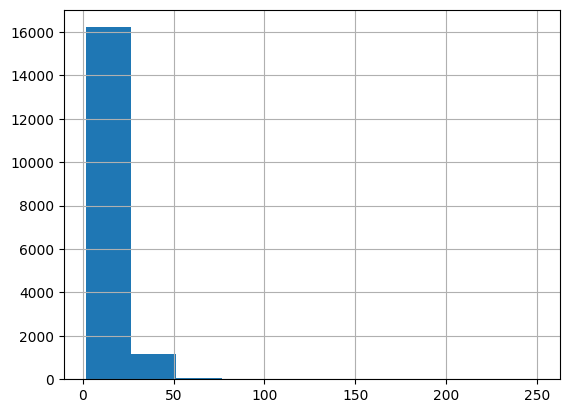

In [ ]:
b.hist()

In [ ]:
dataset.dataset.isna().sum()

AttributeError: ignored

In [ ]:
dataset[dataset['Brand'].isna()]


,Unnamed: 0,Name,Brand,Description,Notes
263602,263687,Brighton Librarian's League,NaN,'I adore and zesty this Woody is is,"tangerine, pink grapefruit"
263603,263688,Brighton Librarian's League,NaN,'I adore how air Woody Citrus Spring is Brighton,"tangerine, pink grapefruit"
263604,263689,Brighton Librarian's League,NaN,air and Woody Spring is in with Brighton ',"tangerine, pink grapefruit"
263605,263690,Brighton Librarian's League,NaN,adore air zesty Woody Citrus is Spring the ',"tangerine, pink grapefruit"
263606,263691,Brighton Librarian's League,NaN,'I adore how air this is with Brighton ',"tangerine, pink grapefruit"
263607,263692,Brighton Librarian's League,NaN,'I and bright this Woody Citrus Spring air ',"tangerine, pink grapefruit"
263608,263693,Brighton Librarian's League,NaN,and how Woody Citrus is Spring is in the Brighton,"tangerine, pink grapefruit"
263609,263694,Brighton Librarian's League,NaN,'I adore and bright how this Woody Citrus is Spring is air,"tangerine, pink grapefruit"
263610,263695,Brighton Librarian's League,NaN,'I this Woody is Spring ',"tangerine, pink grapefruit"
263611,263696,Brighton Librarian's League,NaN,'I adore bright zesty this Woody is Spring is air ',"tangerine, pink grapefruit"


In [ ]:
# 결측치를 빈 문자열로 대체하고 부동 소수점 값을 문자열로 변환
dataset['Brand'] = dataset['Description'].fillna('').astype(str)

In [ ]:
result = dataset.groupby(['Name', 'Brand', 'Notes'])['Description'].apply(lambda x: '\n'.join(x)).reset_index()
result

,Name,Brand,Notes,Description
0,"""Special Edition"" Betty Boop",Betty Boop,"mandarin, orange blossom, blooming iris, cedar...","'This is for ""Sexy"" Betty-- in one of the bott..."
1,# 384 FumÃ©e sur le lait,Le RÃ© Noir,"Milk, Vetiver, Cashmeran,",
2,# 414 FCdG,Le RÃ© Noir,"tangerine, ice, Grapefruit, unripe berries,",
3,# 416 N'oubliez jamais,Le RÃ© Noir,"aldehydes, green notes, Narcissus, hyacinth, Y...",
4,# 417 CÃ´te d'obscuritÃ©,Le RÃ© Noir,"wormwood, Oud, Sandalwood, Saffron,",
...,...,...,...,...
37217,Ð¤ÑÐ¾Ð¼ Ð Ð°ÑÐ° Ð²Ð¸Ð· ÐÐ°Ð²Ñ / From Russi...,Denis Simachev,"watermelon, kiwi, pink pepper",
37218,â 02 - L'Air du DÃ©sert Marocain,Tauer Perfumes,L'Air du DÃ©sert Marocain by Tauer Perfumes is...,"Ambergris, Cedarwood, Cistus, Cumin, Vetiver"
37219,â 03 - Lonestar Memories,Tauer Perfumes,"Lonestar Memories by Tauer Perfumes, released ...","Carrot seed, Cistus, Clary Sage, Green geraniu..."
37220,â 06 - Incense RosÃ©,Tauer Perfumes,Incense RosÃ© by Tauer Perfumes is a unisex fr...,"Cardamom, Frankincense, Myrrh, Texas cedar, Ve..."


In [ ]:
# Pandas 출력 설정 변경: 열의 최대 너비를 None으로 설정
pd.set_option('display.max_colwidth', None)

result[result['Name'] == 'Gentleman Society']['Description']

13511    It's so forgettable that I don't really remember what it smelled like when I sprayed it in the perfume store. Just a pleasant, mildly soapy kind of weak run of the mill scent.\nI don't want to waste my time typing a deatiled opinion. Givenchy Society is just like today's society. Bland, characterless and insipid.\r\n\r\nThe fragrance itself is vanilla sweet, powdery and "smooth", but also has nothing in it that makes a person with enough of self awareness to be intrigued or interested.\r\n\r\nOriginality 1/10\r\nScent 4/10\r\nLongevity 8/10\r\nProjection 6/10\r\n_____________________\r\noverall impression 3/10\nI really like Gentlemen Society for one simple reason- it immediately transports me to working at Hollister in high school and just blasting the store down in 'Jake' \r\n\r\nGiant commercial spray bottle and everything \r\n\r\nAnd I mean that, this stuff hangs around. Real thick like\r\n\r\nVaranis kept referring back to a vacation vibe and to get more granular I would 

In [ ]:
# data = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\git_fd\ty\perfume_data', encoding= 'latin-1')   #데이터프레임
# # dataset = data.copy()
# dataset.tail(3)

,Unnamed: 0,Name,Brand,Description,Notes,Image URL
4773,2188,Bronze Eau de Parfum,Nanadebary,"Bronze is a naughty little vixen of a scent, ...","bergamot, mandarine, cinnamon, jasmine, iris,...",https://static.luckyscent.com/images/products/...
4774,2189,Monyette Paris Fragrance Oil,Monyette Paris,"This isn't just sexy, it's Ã¬big night outÃ® ...","Tahitian gardenia, French muguet du bois, hin...",https://static.luckyscent.com/images/products/...
4775,2190,1270 Eau de Parfum,Frapin,Named for the year the Frapin family establis...,"exotic woods, spice, raisin, vine flowers, pe...",https://static.luckyscent.com/images/products/...


In [ ]:
dataset[dataset['Name'] == 'La Fiesta']['Notes'].unique()

array([' '], dtype=object)

In [ ]:
dataset[dataset['Brand'].isna()]

,Unnamed: 0,Name,Brand,Description,Notes,Img URL
4926,4926,Raw Gold,NaN,NaN,,https://basenotes.com/img/product/
12756,12756,Jeanne Lanvin My Sin,NaN,NaN,"Apricot, Pear",https://basenotes.com/img/product/
15300,15300,Eclectic Elements : Wild Green,NaN,NaN,"Orange Flower, Coriander Seed, Bergamot",https://basenotes.com/img/product/26148650-1827-j
23105,23105,Mojo Magique,NaN,NaN,"lemon, grapefruit, mandarin",https://basenotes.com/img/product/26138054-6250-j
27336,27336,Le Mimosa,NaN,NaN,"Mimosa, peach, anise, iris, white musk",https://basenotes.com/img/product/26132753-j
27460,27460,Brighton Librarian's League,NaN,'I adore how bright and zesty this Woody Citru...,"tangerine, pink grapefruit",https://basenotes.com/img/product/
27466,27466,Park Lane Horticulturist's Society,NaN,NaN,"clementine, peach, marine notes",https://basenotes.com/img/product/26135434-j
27469,27469,Association of Leisurely Pursuits,NaN,NaN,"bergamot, coriander",https://basenotes.com/img/product/
27476,27476,Chelsea Garden Club,NaN,NaN,"ozone, geranium, lemon",https://basenotes.com/img/product/
27500,27500,Thames Yachting Club,NaN,NaN,"lemon, orange, melon",https://basenotes.com/img/product/


In [ ]:
# 디스크립션 NaN, 노트는 ‘공백 ‘이 들어간 경우 확인
null_df = dataset[dataset['Description'] == 'NaN']
null_df

,Unnamed: 0,Name,Brand,Description,Notes,Img URL


In [ ]:
dataset.isna().sum()

Unnamed: 0         0
Name               0
Brand              0
Description    17626
Notes             82
Img URL            0
dtype: int64

In [ ]:
#디스크립션 NaN, 노트는 ‘공백 ‘이 들어간 경우 1017개 결측치 제거
dataset.drop(dataset[(dataset['Description'].isna()) & (dataset['Notes'] == ' ')].index, inplace=True)

In [ ]:
dataset.drop(dataset['Description']

In [ ]:
# 결측치 제거
dataset.dropna(subset=['Name', 'Brand'], inplace=True)

In [ ]:
dataset['Brand'].value_counts().head(20)

Brand
Avon                         424
Zara                         355
Victoria's Secret            260
Guerlain                     259
DSH Perfumes                 198
Bath and Body Works          196
Oriflame                     168
Dua Fragrances               167
O BoticÃ¡rio                 162
Montale                      161
Givenchy                     155
Giorgio Armani               152
Sixteen92                    150
Demeter Fragrance Library    149
Christian Dior               145
Xerjoff                      144
L'Occitane                   141
4160 Tuesdays                131
Calvin Klein                 130
Amouage                      129
Name: count, dtype: int64

In [ ]:
#'Description' 없는 것 개수
dataset['Description'].isna().sum()

17626

In [ ]:
dataset.describe()

,Unnamed: 0
count,36608.000000
mean,18812.359512
std,10854.865525
min,0.000000
25%,9440.750000
50%,18749.500000
75%,28259.250000
max,37639.000000


In [ ]:
#이미지 없는 것 2081개 존재 (img url = https://basenotes.com/img/product/)
dataset['Img URL'].isna().sum()


0

In [ ]:
# 필요한 열 선택 (향수 이름, 향수 설명, 향수 노트)
main = dataset[['Name', 'Description', 'Notes']]
main.tail(3)


,Name,Description,Notes
37629,Aguirre,"""Having smelled more than my fair share of clo...","Oriental notes, Woods"
37630,Gammon Individual Touch,NaN,Violet
37639,Vison Noir,NaN,"mandarin, bergamot, blackcurrant, galbanum, co..."


In [ ]:
features = dataset['Notes']+ ' ' + dataset['Description']
perfume_descriptions  = features.astype(str).tolist() #문자열로 변경, 리스트 형식으로 변경
perfume_descriptions

["sage, vetiver, cedarwood so forgettable I don't really it smelled like what I it in the perfume store mildly the",
 "sage, vetiver, cedarwood so forgettable don't really when it smelled like what it in perfume Just a pleasant kind run of the scent",
 "sage, vetiver, cedarwood forgettable that I don't remember when it like I sprayed it in a soapy of weak of scent",
 "sage, vetiver, cedarwood It's so forgettable that don't it what it in perfume store a kind of run of the mill",
 "sage, vetiver, cedarwood It's so forgettable I when like it perfume store pleasant soapy kind weak of the mill",
 "sage, vetiver, cedarwood that I don't really remember what it in perfume store Just of run",
 "sage, vetiver, cedarwood It's so don't smelled I in the store Just a mildly weak run of the scent",
 'sage, vetiver, cedarwood forgettable I when it perfume store a pleasant mildly soapy kind of weak the mill scent',
 "sage, vetiver, cedarwood It's so don't it smelled like I sprayed in the store mildly k

In [ ]:
text = perfume_descriptions
text

["sage, vetiver, cedarwood so forgettable I don't really it smelled like what I it in the perfume store mildly the",
 "sage, vetiver, cedarwood so forgettable don't really when it smelled like what it in perfume Just a pleasant kind run of the scent",
 "sage, vetiver, cedarwood forgettable that I don't remember when it like I sprayed it in a soapy of weak of scent",
 "sage, vetiver, cedarwood It's so forgettable that don't it what it in perfume store a kind of run of the mill",
 "sage, vetiver, cedarwood It's so forgettable I when like it perfume store pleasant soapy kind weak of the mill",
 "sage, vetiver, cedarwood that I don't really remember what it in perfume store Just of run",
 "sage, vetiver, cedarwood It's so don't smelled I in the store Just a mildly weak run of the scent",
 'sage, vetiver, cedarwood forgettable I when it perfume store a pleasant mildly soapy kind of weak the mill scent',
 "sage, vetiver, cedarwood It's so don't it smelled like I sprayed in the store mildly k

In [ ]:
# # "sample.txt" 파일을 읽어옵니다. 파일 이름을 필요에 맞게 수정하세요.
# with open('sample.txt', 'r', encoding='utf-8') as file:
#     text = file.readlines()

# 텍스트를 TSV 파일로 저장합니다.
with open('nli_data.tsv', 'w', encoding='utf-8') as tsv_file:
    for line in text:
        line = line.strip()  # 줄 바꿈 문자 제거
        if line:
            # 탭으로 구분된 TSV 형식으로 변환하여 파일에 쓰기
            tsv_file.write(line + '\t' + 'LABEL' + '\n')

print("TSV 파일이 생성되었습니다.")


TSV 파일이 생성되었습니다.


In [ ]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import models, losses
from sentence_transformers import SentencesDataset, LoggingHandler, SentenceTransformer, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
from datetime import datetime
import sys
import os
import gzip
import csv
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--model', type=str, default='klue/bert-base')
parser.add_argument('--batch', type=int, default=32)
parser.add_argument('--evaluation_steps', type=int, default=1000)
parser.add_argument('--epochs', type=int, default=1)

args = parser.parse_args()

model_name = args.model

train_batch_size = args.batch

model_save_path = 'output/training_nli_'+model_name.replace("/", "-")+datetime.now().strftime("%Y-%m-%d_%H-%M-%S") #+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

word_embedding_model = models.Transformer(sbert_model)

# Apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

logging.info("Read AllNLI train dataset")

label2int = {"contradiction": 0, "entailment": 1, "neutral": 2}
train_samples = []

with open('/content/nli_data.tsv', "rt", encoding="utf-8") as fIn:
    lines = fIn.readlines()
    for line in lines:
        s1, s2, label = line.split('\t')
        label = label2int[label.strip()]
        train_samples.append(InputExample(texts=[s1, s2], label=label))

train_dataset = SentencesDataset(train_samples, model=model)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=train_batch_size)
train_loss = losses.SoftmaxLoss(model=model, sentence_embedding_dimension=model.get_sentence_embedding_dimension(), num_labels=len(label2int))


#Read STSbenchmark dataset and use it as development set
logging.info("Read STSbenchmark dev dataset")
dev_samples = []

with open('../Dataset/tune_sts_dev.tsv', 'rt', encoding='utf-8') as fIn:
    lines = fIn.readlines()
    for line in lines:
        s1, s2, score = line.split('\t')
        score = score.strip()
        score = float(score) / 5.0
        dev_samples.append(InputExample(texts= [s1,s2], label=score))

dev_evaluator = EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, batch_size=train_batch_size, name='sts-dev')

num_epochs = args.epochs

warmup_steps = math.ceil(len(train_dataset) * num_epochs / train_batch_size * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

Train the model
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=dev_evaluator,
          epochs=num_epochs,
          evaluation_steps=args.evaluation_steps,
          warmup_steps=warmup_steps,
          output_path=model_save_path
          )



#############################################################################

Load the stored model and evaluate its performance on STS benchmark dataset

#############################################################################

test_samples = []
with open('../Dataset/tune_sts_test.tsv', 'rt', encoding='utf-8') as fIn:
    lines = fIn.readlines()
    for line in lines:
        s1, s2, score = line.split('\t')
        score = score.strip()
        score = float(score) / 5.0
        test_samples.append(InputExample(texts=[s1,s2], label=score))

print("\n\n\n")
print("======================TEST===================")
print("\n\n\n")
model = SentenceTransformer(model_save_path)
print(f"model save path > {model_save_path}")
test_evaluator = EmbeddingSimilarityEvaluator.from_input_examples(test_samples, batch_size=train_batch_size, name='sts-test')
test_evaluator(model, output_path=model_save_path)

usage: ipykernel_launcher.py [-h] [--model MODEL] [--batch BATCH]
                             [--evaluation_steps EVALUATION_STEPS]
                             [--epochs EPOCHS]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-199e63ba-e55e-4487-b351-bf9a4a28f527.json


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# SBERT 사용

In [ ]:
###############################################################################################################

In [ ]:
!pip install --upgrade translators
import translators as ts

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util, models
from tqdm import tqdm #진행자

In [ ]:
from sentence_transformers import models
# SBERT 모델을 로드합니다.
sbert_model = SentenceTransformer('bert-base-uncased', cache_folder='/root/.cache/torch/sentence_transformers')

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers\bert-base-uncased. Creating a new one with MEAN pooling.


In [ ]:
# 향수 설명 데이터(리스트 형식)를 SBERT로 임베딩
perfume_embeddings = []
for description in tqdm(perfume_descriptions, desc="Embedding Perfume Descriptions"):
    description_embedding = sbert_model.encode(description, convert_to_tensor=True)
    perfume_embeddings.append(description_embedding)

Embedding Perfume Descriptions:   0%|          | 0/36608 [00:00<?, ?it/s]

Embedding Perfume Descriptions: 100%|██████████| 36608/36608 [3:22:39<00:00,  3.01it/s]   


In [ ]:
from IPython.display import Image
from PIL import Image
import requests
from io import BytesIO
from IPython.display import HTML


In [ ]:

    recommended_perfume = dataset.loc[3]
    print("브랜드:", recommended_perfume['Brand'], '(영문): ',ts.translate_text(recommended_perfume['Brand'], translator= 'google', to_language='en'))
    print("이름:", recommended_perfume['Name'], '(영문): ', ts.translate_text(recommended_perfume['Name'], translator= 'google', to_language='en'))
    # print("노트:", ts.translate_text(recommended_perfume['Notes'], translator= 'modernMt', to_language='ko'))
    print("노트 & 설명:", ts.translate_text(perfume_descriptions[idx], translator= 'modernMt', to_language='ko'))
    keyword = dataset['Name'][3].replace(' ', '+')
    print('구매하러 가기: https://www.amazon.com/s?k='+ keyword +'&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20')
    image_url = recommended_perfume['Img URL']
    # HTML 이미지 태그 생성
    image_html = f'<img src="{image_url}" width="300" height="300">'
    # HTML 코드를 IPython의 HTML 객체로 출력
    display(HTML(image_html))
    print('\n\n')



# 이미지 URL
image_url = recommended_perfume['Img URL']



브랜드: Givenchy (영문):  Givenchy
이름: Gentleman Society (영문):  Gentleman Society
노트 & 설명: '탁월한 봄 향기 별 5개' 이탈리아 레몬, 스페인 오렌지 꽃
img: https://basenotes.com/img/product/8611672741796-j
구매하러 가기: https://www.amazon.com/s?k=Gentleman+Society&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20


In [ ]:
# 사용자 입력 문장
user_input = "진하고 깊은 생무화과향(fig)나고 달달한 향수 추천해줘"
# 문장번역
user_input = ts.translate_text(user_input, translator='modernMt', from_language='ko')
# 영어로 번역된 사용자 입력을 SBERT 모델로 임베딩합니다.
user_input_embedding = sbert_model.encode(user_input, convert_to_tensor=True)
# 각 향수 설명과 사용자 입력 간의 코사인 유사도를 계산합니다.
similarities = []
for description_embedding in tqdm(perfume_embeddings, desc="Calculating Similarities"):
    similarity = util.pytorch_cos_sim(user_input_embedding, description_embedding)
    similarities.append(similarity.item())

# 상위 N개의 유사한 향수를 추출합니다.
N = 3  # 상위 N개 설정
best_match_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:N]

# 상위 N개의 유사한 향수 정보를 출력합니다.
print("추천 향수 정보:")
for idx in best_match_indices:
    try:
        recommended_perfume = dataset.loc[idx]
        print("• 브랜드:", recommended_perfume['Brand'], '(영문): ',ts.translate_text(recommended_perfume['Brand'], translator= 'google', to_language='en'))
        print("• 이름:", recommended_perfume['Name'], '(영문): ', ts.translate_text(recommended_perfume['Name'], translator= 'google', to_language='en'))
        print("• 노트 & 설명:", ts.translate_text(perfume_descriptions[idx], translator= 'modernMt', to_language='ko'))
        keyword = dataset['Name'][idx].replace(' ', '+')
        image_url = recommended_perfume['Img URL']
        print('• 구매하기: https://www.amazon.com/s?k='+ keyword +'&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20')
        # HTML 이미지 태그 생성
        image_html = f'<img src="{image_url}" width="300" height="300">'
        # HTML 코드를 IPython의 HTML 객체로 출력
        display(HTML(image_html))

        print('\n\n')
        print('\n\n')
    except KeyError:
        pass






Calculating Similarities: 100%|██████████| 36608/36608 [00:02<00:00, 14162.12it/s]


추천 향수 정보:
• 브랜드: Etat Libre d'Orange (영문):  Orange Free State
• 이름: Frustration (영문):  Frustration
• 노트 & 설명: 럼, 커민, 시나몬 이 향수는 사프란이나 탄 설탕을 연상시키는 눈에 띄는 달콤한 바닐라 노트가 특징입니다. 전체적인 향은 인공 앰브록산과 같은 품질로 더 달콤한 편입니다. 달콤한 향을 좋아하고 즐기는 분들에게 적합합니다. 달콤한 바닐라와 사프란 같은 또는 탄 설탕 협정의 조합은 흥미롭고 탐스러운 향기를 만듭니다. 그러나 더 자연스럽거나 복잡한 향을 선호한다면 이 향이 당신에게 가장 적합하지 않을 수 있습니다. 개인 취향은 향수 선택에 중요한 역할을 하므로 구매하기 전에 항상 샘플을 시도하거나 향수를 테스트하는 것이 좋습니다.
• 구매하기: https://www.amazon.com/s?k=Frustration&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20








• 브랜드: Bissoumine (영문):  Priceless
• 이름: Souffle Sauvage (영문):  Wild breath
• 노트 & 설명: Dolce & Gabbana의 L'Impératrice는 매혹적인 향기를 찾는 사람들에게 완벽한 선택입니다. 이 여성스러운 향수는 과일향, 상큼한 향, 달콤한 향, 꽃향, 수중 향이 웅장하게 어우러져 왕족의 기분을 느끼게 해줍니다. 향긋한 조합은 틀림없이 당신의 감각을 사로잡고 내면의 여신을 끌어낼 것입니다. 향은 평균적인 실리지로 수명이 좋아 매일 사용하거나 야간 외출이나 저녁 행사와 같은 레저 행사에 적합합니다. 특히 여성들은 이 기분 좋은 향기를 좋아하고 여름과 봄에 이상적입니다. 자신감을 높이고 싶다면 L'Impératrice를 고려해 볼 가치가 있습니다.
 키위, 핑크 시클라멘, 레드 커런트, 루바브, 수박
• 구매하기: https://www.amazon.com/s?k=Souffle+Sauvage&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20








• 브랜드:  Kilian  (영문):  Kilian
• 이름: Cruel Intentions Tempt Me  (영문):  Cruel Intentions Tempt Me
• 노트 & 설명: 2007년에 출시된 유니섹스 향수 XerJoff의 Shooting Stars Uden은 은은한 시트러스와 달콤한 향으로 상큼한 향기를 찾는 분들에게 적합합니다. 프레젠테이션은 최고 품질이며 수명과 잔상이 모두 좋습니다. 레저 활동 중이나 봄 또는 여름 내내 매일 착용할 때 가장 잘 즐길 수 있습니다. 남성과 청소년은 자신의 취향에 특히 적합하다고 생각할 수 있지만 여성도 그 구성을 좋아할 수 있습니다. XerJoff의 Shooting Stars Uden은 합리적인 가격으로 훌륭한 가치를 제공합니다.
 자몽, 레몬, 머스크, 샌달우드, 바닐라
• 구매하기: https://www.amazon.com/s?k=Cruel+Intentions+Tempt+Me+&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20


In [ ]:

keyword = dataset['Name'][idx].replace(' ', '+')
name1

print('Shopping': https://www.amazon.com/s?k='+name1+'&i=beauty&rh=p_n_availability%3A-1&linkCode=osi&tag=q00c8-20')

SyntaxError: invalid syntax (3829103797.py, line 4)

In [ ]:
!pip install --upgrade translators

문장 번역, translator 성능 비교

In [ ]:
import translators as ts

import random
import pickle
import re

In [ ]:
translator = ts.translators_pool
translator

['alibaba',
 'apertium',
 'argos',
 'baidu',
 'bing',
 'caiyun',
 'cloudTranslation',
 'deepl',
 'elia',
 'google',
 'iciba',
 'iflytek',
 'iflyrec',
 'itranslate',
 'judic',
 'languageWire',
 'lingvanex',
 'niutrans',
 'mglip',
 'mirai',
 'modernMt',
 'myMemory',
 'papago',
 'qqFanyi',
 'qqTranSmart',
 'reverso',
 'sogou',
 'sysTran',
 'tilde',
 'translateCom',
 'translateMe',
 'utibet',
 'volcEngine',
 'yandex',
 'yeekit',
 'youdao']

In [ ]:
result = '노트: ', recommended_perfume['Description'] + ' ' + recommended_perfume['Notes']
result

'Benzoin, Gaiac wood, Rum, Tobacco, Tonka bean Bvlgari Man In Black is a powerful scent that makes a strong impression. It is ideal for men who want to feel confident and admired in any occasion, especially the evening time. The unique composition of this fragrance includes elements of spice, woody, sweet, oriental, leathery and smoky notes which create an overall luxurious aroma. This perfume has exceptional longevity allowing it to stay on your skin throughout the night when you go out or just spending leisure time with friends. It also offers great value for money as it comes in an attractive presentation making this scent even more special. If you are looking for something masculine yet sophisticated - Bvlgari Man In Black might be just right for you.\r\n'

In [ ]:
sample_aug = ts.translate_text(re, translator= 'bing', to_language='ko')
sample_aug

In [ ]:
print('papago; ', ts.translate_text(result, translator= 'papago', to_language='ko'))
print('google: ', ts.translate_text(result, translator= 'google', to_language='ko'))
print('bing(좋음): ', ts.translate_text(result, translator= 'bing', to_language='ko'))
print('cloudTranslation(별로): ', ts.translate_text(result, translator= 'cloudTranslation', to_language='ko'))

papago;  벤조인, 가이아크 우드, 럼, 토바코, 통카 빈 블가리 맨 인 블랙은 강한 인상을 주는 강력한 향이다. 그것은 어떤 경우에도, 특히 저녁 시간에, 자신감을 느끼고 감탄하고 싶은 남자들에게 이상적이다. 이 향의 독특한 구성은 전반적으로 고급스러운 향을 만드는 향신료, 목질, 스위트, 동양적인, 가죽 같고 스모키한 노트의 요소들을 포함한다. 이 향수는 밖에 나갈 때 밤새 피부에 남아 있거나 친구들과 여가 시간을 보낼 수 있는 탁월한 수명을 가지고 있다. 그것은 또한 이 향을 더욱 특별하게 만드는 매력적인 프레젠테이션으로 제공되므로 비용 면에서 큰 가치를 제공한다. 만약 당신이 남성적이면서도 세련된 것을 찾고 있다면 - 블가리 맨 인 블랙이 당신에게 딱 맞을 것이다.
google:  Benzoin, Gaiac Wood, Rum, Tobacco, Tonka Bean Bvlgari Man in Black은 강력한 인상을주는 강력한 향기입니다. 어떤 경우, 특히 저녁 시간에 자신감을 느끼고 존경 받고 싶어하는 남성에게 이상적입니다. 이 향수의 독특한 구성에는 향신료, 우디, 달콤한, 동양, 가죽 및 스모키 노트의 요소가 포함되어 있으며, 이는 전반적인 고급스러운 향기를 만듭니다. 이 향수는 탁월한 장수가있어 외출하거나 친구들과 레저 시간을 보낼 때 밤새 피부에 머물 수 있습니다. 또한 매력적인 프레젠테이션 에서이 향기를 더욱 특별하게 만드는 데 큰 가치를 제공합니다. 당신이 남성적이지만 정교한 것을 찾고 있다면 - Bvlgari Man in Black은 당신에게 적합 할 것입니다.
bing:  벤조인, 가이악 우드, 럼, 담배, 통카콩 불가리 맨 인 블랙은 강렬한 인상을 주는 강력한 향입니다. 어떤 경우, 특히 저녁 시간에 자신감과 존경을 느끼고 싶은 남성에게 이상적입니다. 이 향수의 독특한 구성에는 향신료, 우디, 달콤함, 오리엔탈, 가죽 및 스모키 노트의 요소가 포함되어 전체적으로 고급스러운 향을 만듭니다. 이 향수는 수명이 매우 길기 때문에 외출할 

### 정성 평가
- 좋은 성능 : modernMt > bing > papago
- 별로 : cloudTranslation, translateCom,

In [ ]:
for i in translator:
    try:
        print(i, ': ' , ts.translate_text(result, i, to_language='ko'))

    except UserWarning:
        pass

argos :  벤조인, 가이아크 나무, 럼, 담배, Tonka 콩 불가리 남자 검은 색은 강한 인상을 만드는 강력한 향기입니다. 그것은 어떤 경우에, 특히 저녁 시간에 자신감과 감탄을 느끼고 싶은 남자를 위해 이상적입니다. 이 향기의 독특한 구성은 향신료, woody, 단맛, 동양, 가죽 및 smoky 노트의 요소가 포함되어있어 전반적인 고급스러운 향기를 만듭니다. 이 향수는 특별한 긴 수명을 가지고있어 밤에 피부 전체에 머물거나 친구들과 함께 레저 시간을 보내도록합니다. 이 향기를 더욱 특별하게 만드는 매력적인 프레젠테이션에 관해서는 돈을 위한 훌륭한 가치를 제공합니다. 당신이 찾고있는 경우 뭔가 masculine 아직 정교 - Bvlgari Man In Black 당신은 단지 당신을 위해 권리가있을 수 있습니다.
bing :  벤조인, 가이악 우드, 럼, 담배, 통카콩 불가리 맨 인 블랙은 강렬한 인상을 주는 강력한 향입니다. 어떤 경우, 특히 저녁 시간에 자신감과 존경을 느끼고 싶은 남성에게 이상적입니다. 이 향수의 독특한 구성에는 향신료, 우디, 달콤함, 오리엔탈, 가죽 및 스모키 노트의 요소가 포함되어 전체적으로 고급스러운 향을 만듭니다. 이 향수는 수명이 매우 길기 때문에 외출할 때 밤새 피부에 머물거나 친구들과 여가 시간을 보낼 때 사용할 수 있습니다. 또한 매력적인 프레젠테이션으로 제공되어 이 향을 더욱 특별하게 만들기 때문에 가격 대비 큰 가치를 제공합니다. 남성적이면서도 세련된 것을 찾고 있다면 불가리 맨 인 블랙(Bvlgari Man In Black)이 딱 맞을 것입니다.
caiyun :  Benzoin, Gaiac wood, Rum, Tobacco, Tonka bean Bvlgari Man In Black is a powerful scent that makes a strong impression. It is ideal for men who want to feel confident and admired in any occasion, esp

/usr/local/lib/python3.10/dist-packages/translators/server.py:185: UserWarning: Unsupported [from_language=auto(nl instead)] with [judic]! Please specify it.
  warnings.warn(f'{warn_tips} Please specify it.')
/usr/local/lib/python3.10/dist-packages/translators/server.py:185: UserWarning: Unsupported [from_language=auto(fr instead)] with [languageWire]! Please specify it.
  warnings.warn(f'{warn_tips} Please specify it.')
/usr/local/lib/python3.10/dist-packages/translators/server.py:185: UserWarning: Unsupported [from_language=auto(zh-Hans_CN instead)] with [lingvanex]! Please specify it.
  warnings.warn(f'{warn_tips} Please specify it.')


modernMt :  벤조인, 가이악 우드, 럼, 담배, 통카 빈 불가리 맨 인 블랙은 강한 인상을 남기는 강력한 향입니다. 어떤 경우에도 자신감을 갖고 감탄하고 싶은 남성, 특히 저녁 시간에 이상적입니다. 이 향수의 독특한 구성에는 향신료, 우디, 스위트, 오리엔탈, 가죽 및 스모키 노트의 요소가 포함되어 전반적으로 고급스러운 향기를 만듭니다. 이 향수는 외출하거나 친구들과 여가를 보낼 때 밤새 피부에 남아있을 수 있도록 뛰어난 수명을 자랑합니다. 또한 이 향을 더욱 특별하게 만드는 매력적인 프레젠테이션을 통해 가격 대비 훌륭한 가치를 제공합니다. 남성적이면서도 세련된 것을 찾고 있다면 Bvlgari Man In Black이 적합할 수 있습니다.
papago :  벤조인, 가이아크 우드, 럼, 토바코, 통카 빈 블가리 맨 인 블랙은 강한 인상을 주는 강력한 향이다. 그것은 어떤 경우에도, 특히 저녁 시간에, 자신감을 느끼고 감탄하고 싶은 남자들에게 이상적이다. 이 향의 독특한 구성은 전반적으로 고급스러운 향을 만드는 향신료, 목질, 스위트, 동양적인, 가죽 같고 스모키한 노트의 요소들을 포함한다. 이 향수는 밖에 나갈 때 밤새 피부에 남아 있거나 친구들과 여가 시간을 보낼 수 있는 탁월한 수명을 가지고 있다. 그것은 또한 이 향을 더욱 특별하게 만드는 매력적인 프레젠테이션으로 제공되므로 비용 면에서 큰 가치를 제공한다. 만약 당신이 남성적이면서도 세련된 것을 찾고 있다면 - 블가리 맨 인 블랙이 당신에게 딱 맞을 것이다.


/usr/local/lib/python3.10/dist-packages/translators/server.py:185: UserWarning: Unsupported [from_language=auto(zh instead)] with [qqTranSmart]! Please specify it.
  warnings.warn(f'{warn_tips} Please specify it.')


qqTranSmart :  Benzoin, Gaiac wood, Rum, Tobacco, Tonka Bean B vlgari Man In Black is a power scent that makes a strong impression. 누구를 위한 것인지, 누구를 위한 것인지, 무엇을 위한 것인지, 무엇을 위한 것인지. The unique composition of this fragrance includes of spice, woody, Sweet, orental, leathery and smoky notes 아무리 창조해도 과언이 아니라 overall luxurious aroma. This perfume has exceptional long evity allowing it to stay on your skin throughout the night you go out or just spending lee time with friends. It so offers great value for money as it comes in attractive presentation make this scent even more 스페셜. If you look for some masculine yet soph발령 - Bvlgari Man In Black might be right for you.


/usr/local/lib/python3.10/dist-packages/translators/server.py:185: UserWarning: Unsupported [from_language=auto(zh instead)] with [reverso]! Please specify it.
  warnings.warn(f'{warn_tips} Please specify it.')


sogou :  안식향, Gaiac wood, 럼주, 담배, Tonka bean Bvlgari 흑의인은 강렬한 냄새로 강렬한 인상을 남겼다. 어떤 상황에서도, 특히 밤에는 자신감과 칭찬을 느끼고 싶은 남자에게 적합하다. 이 향수의 독특한 성분으로는 향신료, 목재, 단맛, 동양맛, 가죽맛, 스모키 등이 있어 럭셔리한 전체적인 향기를 만들어 낸다. 이 향수는 비범한 지속성을 가지고 있다. 외출을 하거나 친구들과 여가시간을 보낼 때 밤새 피부에 머무를 수 있다. (윌리엄 셰익스피어, 햄릿, 친구명언) 그것은 또한 이 냄새를 더욱 특별하게 하는 매력적인 소개에 있기 때문에 큰 가치를 제공한다. 만약 당신이 남성적이고 성숙한 것을 찾고 있다면, 보글리 블랙맨이 당신에게 맞을지도 모릅니다.
translateCom :  벤조인, 가이악 우드, 럼, 담배, 통카콩 불가리 맨 인 블랙은 강렬한 인상을 주는 강력한 향입니다.어떤 경우에도 자신감과 존경을 느끼고 싶은 남성에게 이상적입니다
youdao :  安息香、盖亚木、朗姆酒、烟草、通卡豆，宝格丽黑衣男人是一种强大的香味，给人留下深刻的印象。对于那些想要在任何场合，尤其是晚上，都感到自信和受人仰慕的男人来说，这是理想的选择。这款香水的独特成分包括香料，木质，甜味，东方，皮革和烟熏的元素，创造出整体奢华的香气。这款香水具有特殊的持久功效，当你外出或与朋友共度闲暇时光时，它可以在你的皮肤上停留一整晚。它也提供了巨大的价值，因为它出现在一个有吸引力的展示，使这种气味更加特别。如果你正在寻找一些阳刚而精致的东西——宝格丽黑衣人可能正适合你。


In [ ]:
for i in translator:
    try:
        print(i, ': ' , ts.translate_text(result, i, to_language='ko'))

    except:
        pass

argos :  벤조인, 가이아크 나무, 럼, 담배, Tonka 콩 불가리 남자 검은 색은 강한 인상을 만드는 강력한 향기입니다. 그것은 어떤 경우에, 특히 저녁 시간에 자신감과 감탄을 느끼고 싶은 남자를 위해 이상적입니다. 이 향기의 독특한 구성은 향신료, woody, 단맛, 동양, 가죽 및 smoky 노트의 요소가 포함되어있어 전반적인 고급스러운 향기를 만듭니다. 이 향수는 특별한 긴 수명을 가지고있어 밤에 피부 전체에 머물거나 친구들과 함께 레저 시간을 보내도록합니다. 이 향기를 더욱 특별하게 만드는 매력적인 프레젠테이션에 관해서는 돈을 위한 훌륭한 가치를 제공합니다. 당신이 찾고있는 경우 뭔가 masculine 아직 정교 - Bvlgari Man In Black 당신은 단지 당신을 위해 권리가있을 수 있습니다.
bing :  벤조인, 가이악 우드, 럼, 담배, 통카콩 불가리 맨 인 블랙은 강렬한 인상을 주는 강력한 향입니다. 어떤 경우, 특히 저녁 시간에 자신감과 존경을 느끼고 싶은 남성에게 이상적입니다. 이 향수의 독특한 구성에는 향신료, 우디, 달콤함, 오리엔탈, 가죽 및 스모키 노트의 요소가 포함되어 전체적으로 고급스러운 향을 만듭니다. 이 향수는 수명이 매우 길기 때문에 외출할 때 밤새 피부에 머물거나 친구들과 여가 시간을 보낼 때 사용할 수 있습니다. 또한 매력적인 프레젠테이션으로 제공되어 이 향을 더욱 특별하게 만들기 때문에 가격 대비 큰 가치를 제공합니다. 남성적이면서도 세련된 것을 찾고 있다면 불가리 맨 인 블랙(Bvlgari Man In Black)이 딱 맞을 것입니다.
caiyun :  Benzoin, Gaiac wood, Rum, Tobacco, Tonka bean Bvlgari Man In Black is a powerful scent that makes a strong impression. It is ideal for men who want to feel confident and admired in any occasion, esp

/usr/local/lib/python3.10/dist-packages/translators/server.py:185: UserWarning: Unsupported [from_language=auto(zh instead)] with [yeekit]! Please specify it.
  warnings.warn(f'{warn_tips} Please specify it.')


youdao :  安息香、盖亚木、朗姆酒、烟草、通卡豆，宝格丽黑衣男人是一种强大的香味，给人留下深刻的印象。对于那些想要在任何场合，尤其是晚上，都感到自信和受人仰慕的男人来说，这是理想的选择。这款香水的独特成分包括香料，木质，甜味，东方，皮革和烟熏的元素，创造出整体奢华的香气。这款香水具有特殊的持久功效，当你外出或与朋友共度闲暇时光时，它可以在你的皮肤上停留一整晚。它也提供了巨大的价值，因为它出现在一个有吸引力的展示，使这种气味更加特别。如果你正在寻找一些阳刚而精致的东西——宝格丽黑衣人可能正适合你。


학습 데이터셋 만들기

In [ ]:
import re

In [ ]:
###############최최최종 df#############################################################################################
data = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\git_fd\ty\크롤링\miniproject\fin_fin_last_df_dropdu', encoding= 'latin-1')   #데이터프레임
dataset = data.copy()
dataset.head(3)

,Unnamed: 0,Name,Brand,Description,Notes
0,0,Gentleman Society,Givenchy,so forgettable I don't really it smelled like what I it in the perfume store mildly the,"sage, vetiver, cedarwood"
1,1,Gentleman Society,Givenchy,so forgettable don't really when it smelled like what it in perfume Just a pleasant kind run of the scent,"sage, vetiver, cedarwood"
2,2,Gentleman Society,Givenchy,forgettable that I don't remember when it like I sprayed it in a soapy of weak of scent,"sage, vetiver, cedarwood"


In [ ]:
features = dataset['Notes']+ ' ' + dataset['Description']
perfume_descriptions  = features.astype(str).tolist() #문자열로 변경, 리스트 형식으로 변경
perfume_descriptions

["sage, vetiver, cedarwood so forgettable I don't really it smelled like what I it in the perfume store mildly the",
 "sage, vetiver, cedarwood so forgettable don't really when it smelled like what it in perfume Just a pleasant kind run of the scent",
 "sage, vetiver, cedarwood forgettable that I don't remember when it like I sprayed it in a soapy of weak of scent",
 "sage, vetiver, cedarwood It's so forgettable that don't it what it in perfume store a kind of run of the mill",
 "sage, vetiver, cedarwood It's so forgettable I when like it perfume store pleasant soapy kind weak of the mill",
 "sage, vetiver, cedarwood that I don't really remember what it in perfume store Just of run",
 "sage, vetiver, cedarwood It's so don't smelled I in the store Just a mildly weak run of the scent",
 'sage, vetiver, cedarwood forgettable I when it perfume store a pleasant mildly soapy kind of weak the mill scent',
 "sage, vetiver, cedarwood It's so don't it smelled like I sprayed in the store mildly k

In [ ]:
len(perfume_descriptions)

469963

In [ ]:
import sentencepiece as spm

In [ ]:
from tokenizers import ByteLevelBPETokenizer, CharBPETokenizer, SentencePieceBPETokenizer

tokenizer = SentencePieceBPETokenizer()
tokenizer.train(r'C:\Users\User\OneDrive\바탕 화면\git_fd\ty\크롤링\miniproject\fin_fin_last_df_dropdu', vocab_size=10000, min_frequency=5)




['▁so', '▁that', '▁pleasant', '▁really', '▁remember', '▁it', '▁when', '▁store', '▁mildly', '▁kind', '▁run', '▁of', '▁mill']


In [ ]:
# perfume_descriptions에 있는 텍스트를 토큰화하고 학습 데이터로 사용
train_data = []

# TQDM을 사용하여 for 루프 진행 상황을 모니터링합니다.
for description in tqdm(perfume_descriptions, desc="Tokenizing"):
    encoded = tokenizer.encode(description)
    # InputExample 객체로 변환하여 train_data에 추가 (라벨은 None으로 설정)
    train_data.append(InputExample(texts=[encoded.tokens], label=0))

# DataLoader 설정
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=16)

# Loss 함수 설정 (예: TripletLoss 또는 다른 Custom Loss 함수 사용 가능)
loss_function = losses.TripletLoss(model=sbert_model)

Tokenizing: 100%|██████████| 469963/469963 [07:33<00:00, 1036.29it/s] 


In [ ]:
# TQDM을 사용하여 학습 진행 상황을 모니터링합니다.
with tqdm(total=len(train_dataloader), desc="Training") as pbar:
    for epoch in range(1):  # 에포크 수를 조절합니다.
        for batch in train_dataloader:
            # 배치를 모델에 전달하여 학습합니다.
            loss = loss_function(model=sbert_model, sentence_features=batch)

            # TQDM을 업데이트하여 학습 진행 상황을 표시합니다.
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

Training:   0%|          | 0/29373 [00:00<?, ?it/s]


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'sentence_transformers.readers.InputExample.InputExample'>

In [ ]:
# 모델 학습
sbert_model.fit(train_objectives=[(train_dataloader, loss_function)], epochs=1, warmup_steps=100, optimizer_params={'lr': 1e-4})

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/29373 [00:00<?, ?it/s]

RuntimeError: Could not infer dtype of NoneType

In [ ]:
## model 저장하기
    tokenizer.save_pretrained(크롤링/miniproject) #괄호에 폴더명 적으면 그 이름으로 저장됨.
    model.save_pretrained()